# ICLR-2023-Submission-Trends

# Requirements:
```bash
pip install wordcloud nltk pandas imageio selenium tqdm
```
download nltk packages
```python
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('stopwords')

```

## Language process utilities

In [1]:
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
import string


lemmatizer = WordNetLemmatizer()

excluded = ['via', 'towards', 'based', 'method', 'use', 'framework', 'task', 'learn', 'based',
            'model', 'network', 'neural', 'improve', 'deep', 'multi']

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)


def lemmatize(title):
    """lemmatize
    e.g., 'learning' -> 'learn'
    """
    word_list = nltk.word_tokenize(title)
    return [lemmatizer.lemmatize(w.lower(), get_wordnet_pos(w)) for w in word_list]


def remove_stopword(title):
    word_split = title
    valid_word = []
    for word in word_split:
        word = word.strip().strip(string.digits)
        if word != "":
            valid_word.append(word)
    word_split = valid_word
    stop_words = set(stopwords.words('english'))
    # add punctuations
    punctuations = list(string.punctuation)
    [stop_words.add(punc) for punc in punctuations]
    # remove null
    stop_words.add("null")
    stop_words.update(excluded)

    return [word for word in word_split if word not in stop_words]


def transform(title, stopword=True):
    title = title.strip()
    title = lemmatize(title)
    if stopword:
        title = remove_stopword(title)
    return ' '.join(title)


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from imageio import imread
from wordcloud import WordCloud
from functools import partial
sns.set(style='darkgrid', context='talk', palette='colorblind')

# Load data

In [3]:
year = 2023
df = pd.read_csv(f'paperlist_{year}.tsv', index_col=0, sep='\t')
print('# papers:', len(df))
df.head()

# papers: 4517


,title,link,keywords,abstract
paper_id,,,,
kRvZ2PcsxjJj,Quantum reinforcement learning,https://openreview.net/forum?id=kRvZ2PcsxjJj,"quantum reinforcement learning, multi-agent, q...",With the rapid development of quantum technolo...
RUzSobdYy0V,Quantifying and Mitigating the Impact of Label...,https://openreview.net/forum?id=RUzSobdYy0V,NaN,Errors in labels obtained via human annotation...
N3kGYG3ZcTi,Suppression helps: Lateral Inhibition-inspired...,https://openreview.net/forum?id=N3kGYG3ZcTi,"Lateral Inhibition, Convolutional Neural Networks",Convolutional neural networks (CNNs) have beco...
tmIiMPl4IPa,Factorized Fourier Neural Operators,https://openreview.net/forum?id=tmIiMPl4IPa,"fourier transform, fourier operators, pde, nav...",We propose the Factorized Fourier Neural Opera...
mhnHqRqcjYU,DFPC: Data flow driven pruning of coupled chan...,https://openreview.net/forum?id=mhnHqRqcjYU,"Pruning, Data Free, Model Compression",Most structured pruning algorithms achieve sub...


# Title

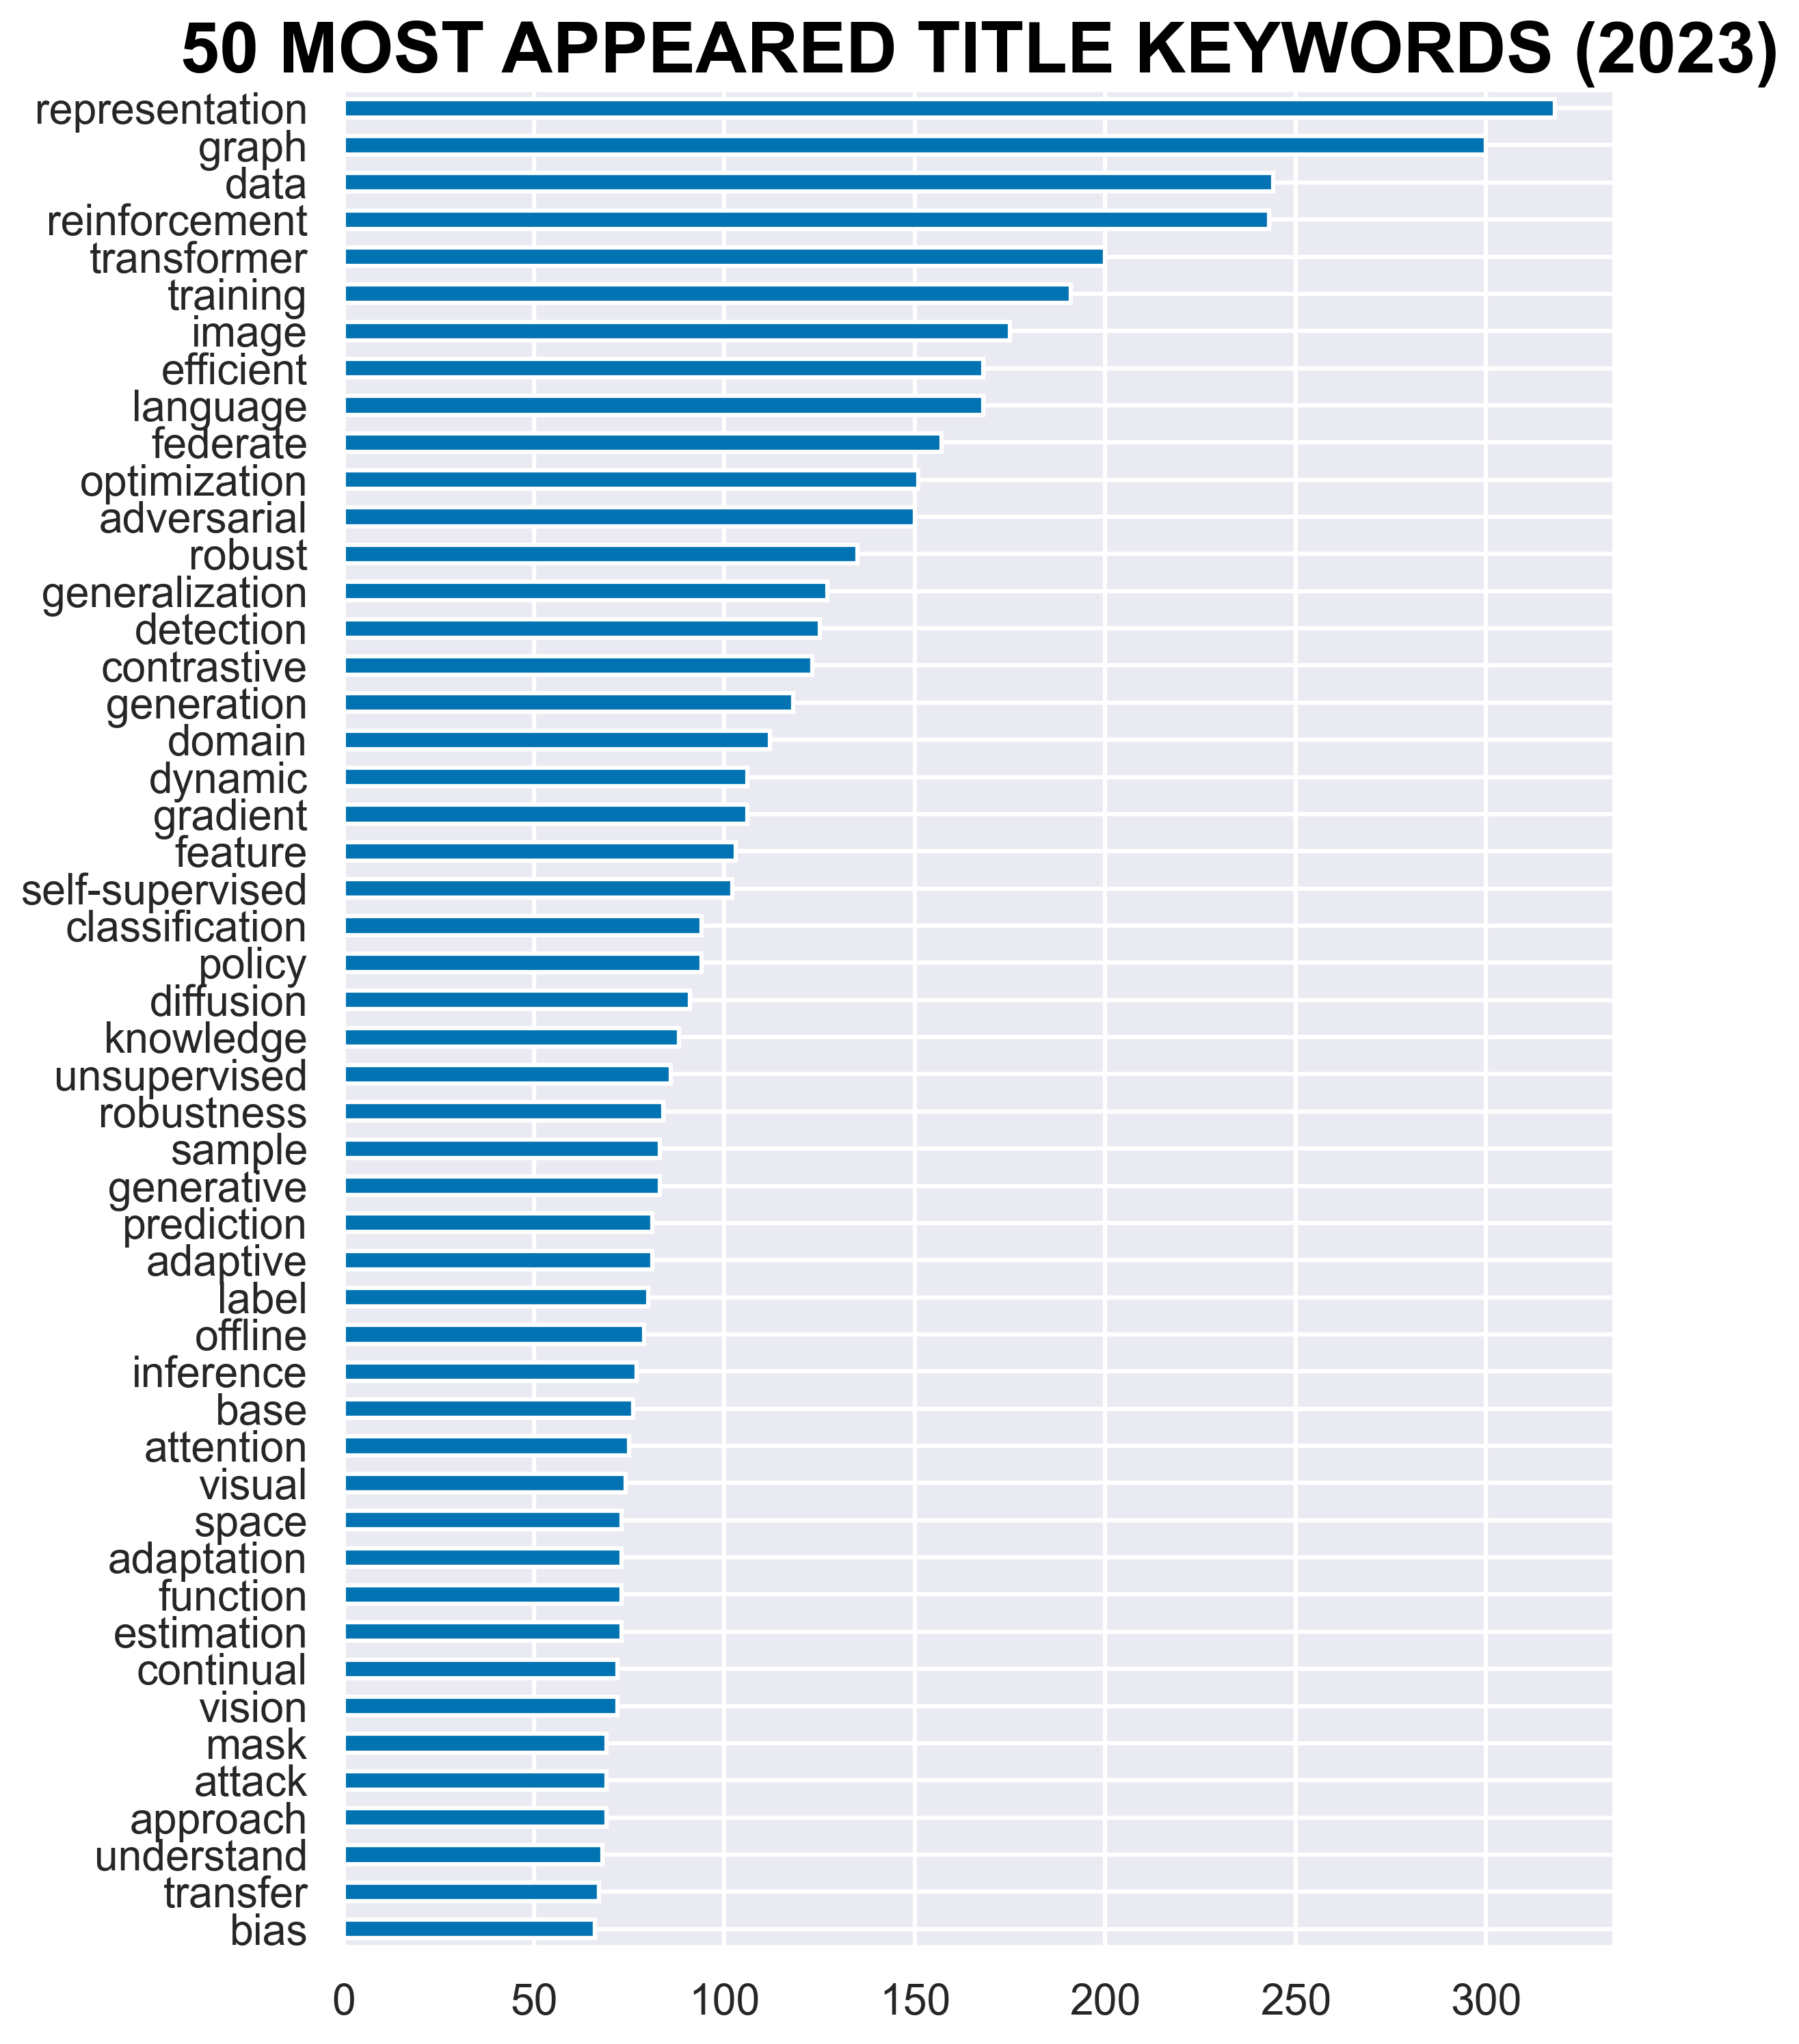

In [4]:
words = pd.Series(
    ' '.join(df['title'].dropna().apply(transform)).split(' ')
).str.strip()

counts = words.value_counts().sort_values(ascending=True)

plt.subplots(dpi=300)
counts.iloc[-50:].plot.barh(figsize=(8, 12), fontsize=15)
plt.title(f'50 MOST APPEARED TITLE KEYWORDS ({year})', loc='center', fontsize='25',
          fontweight='bold', color='black')
plt.savefig(f'sources/50_most_title_{year}.png', dpi=300, bbox_inches='tight')

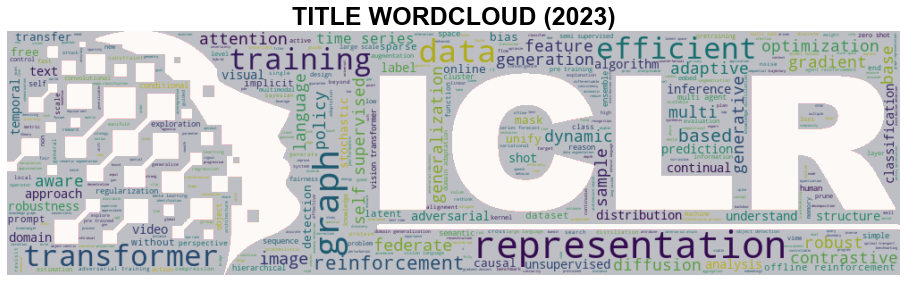

In [5]:
logo = imread('sources/logo-mask.png')
wordcloud = WordCloud(background_color="white", max_words=2000, max_font_size=100, 
           width=1280, height=640, random_state=0, mask=logo).generate(' '.join(words))

fig = plt.figure(figsize=(16, 8))
plt.imshow(logo)
plt.imshow(wordcloud, interpolation='bilinear', alpha=.75)
plt.title(f'TITLE WORDCLOUD ({year})', loc='center', fontsize='25',
          fontweight='bold', color='black')
plt.axis("off")
plt.savefig(f'sources/logo_wordcloud_title_{year}.png', dpi=300, bbox_inches='tight')

# Keywords

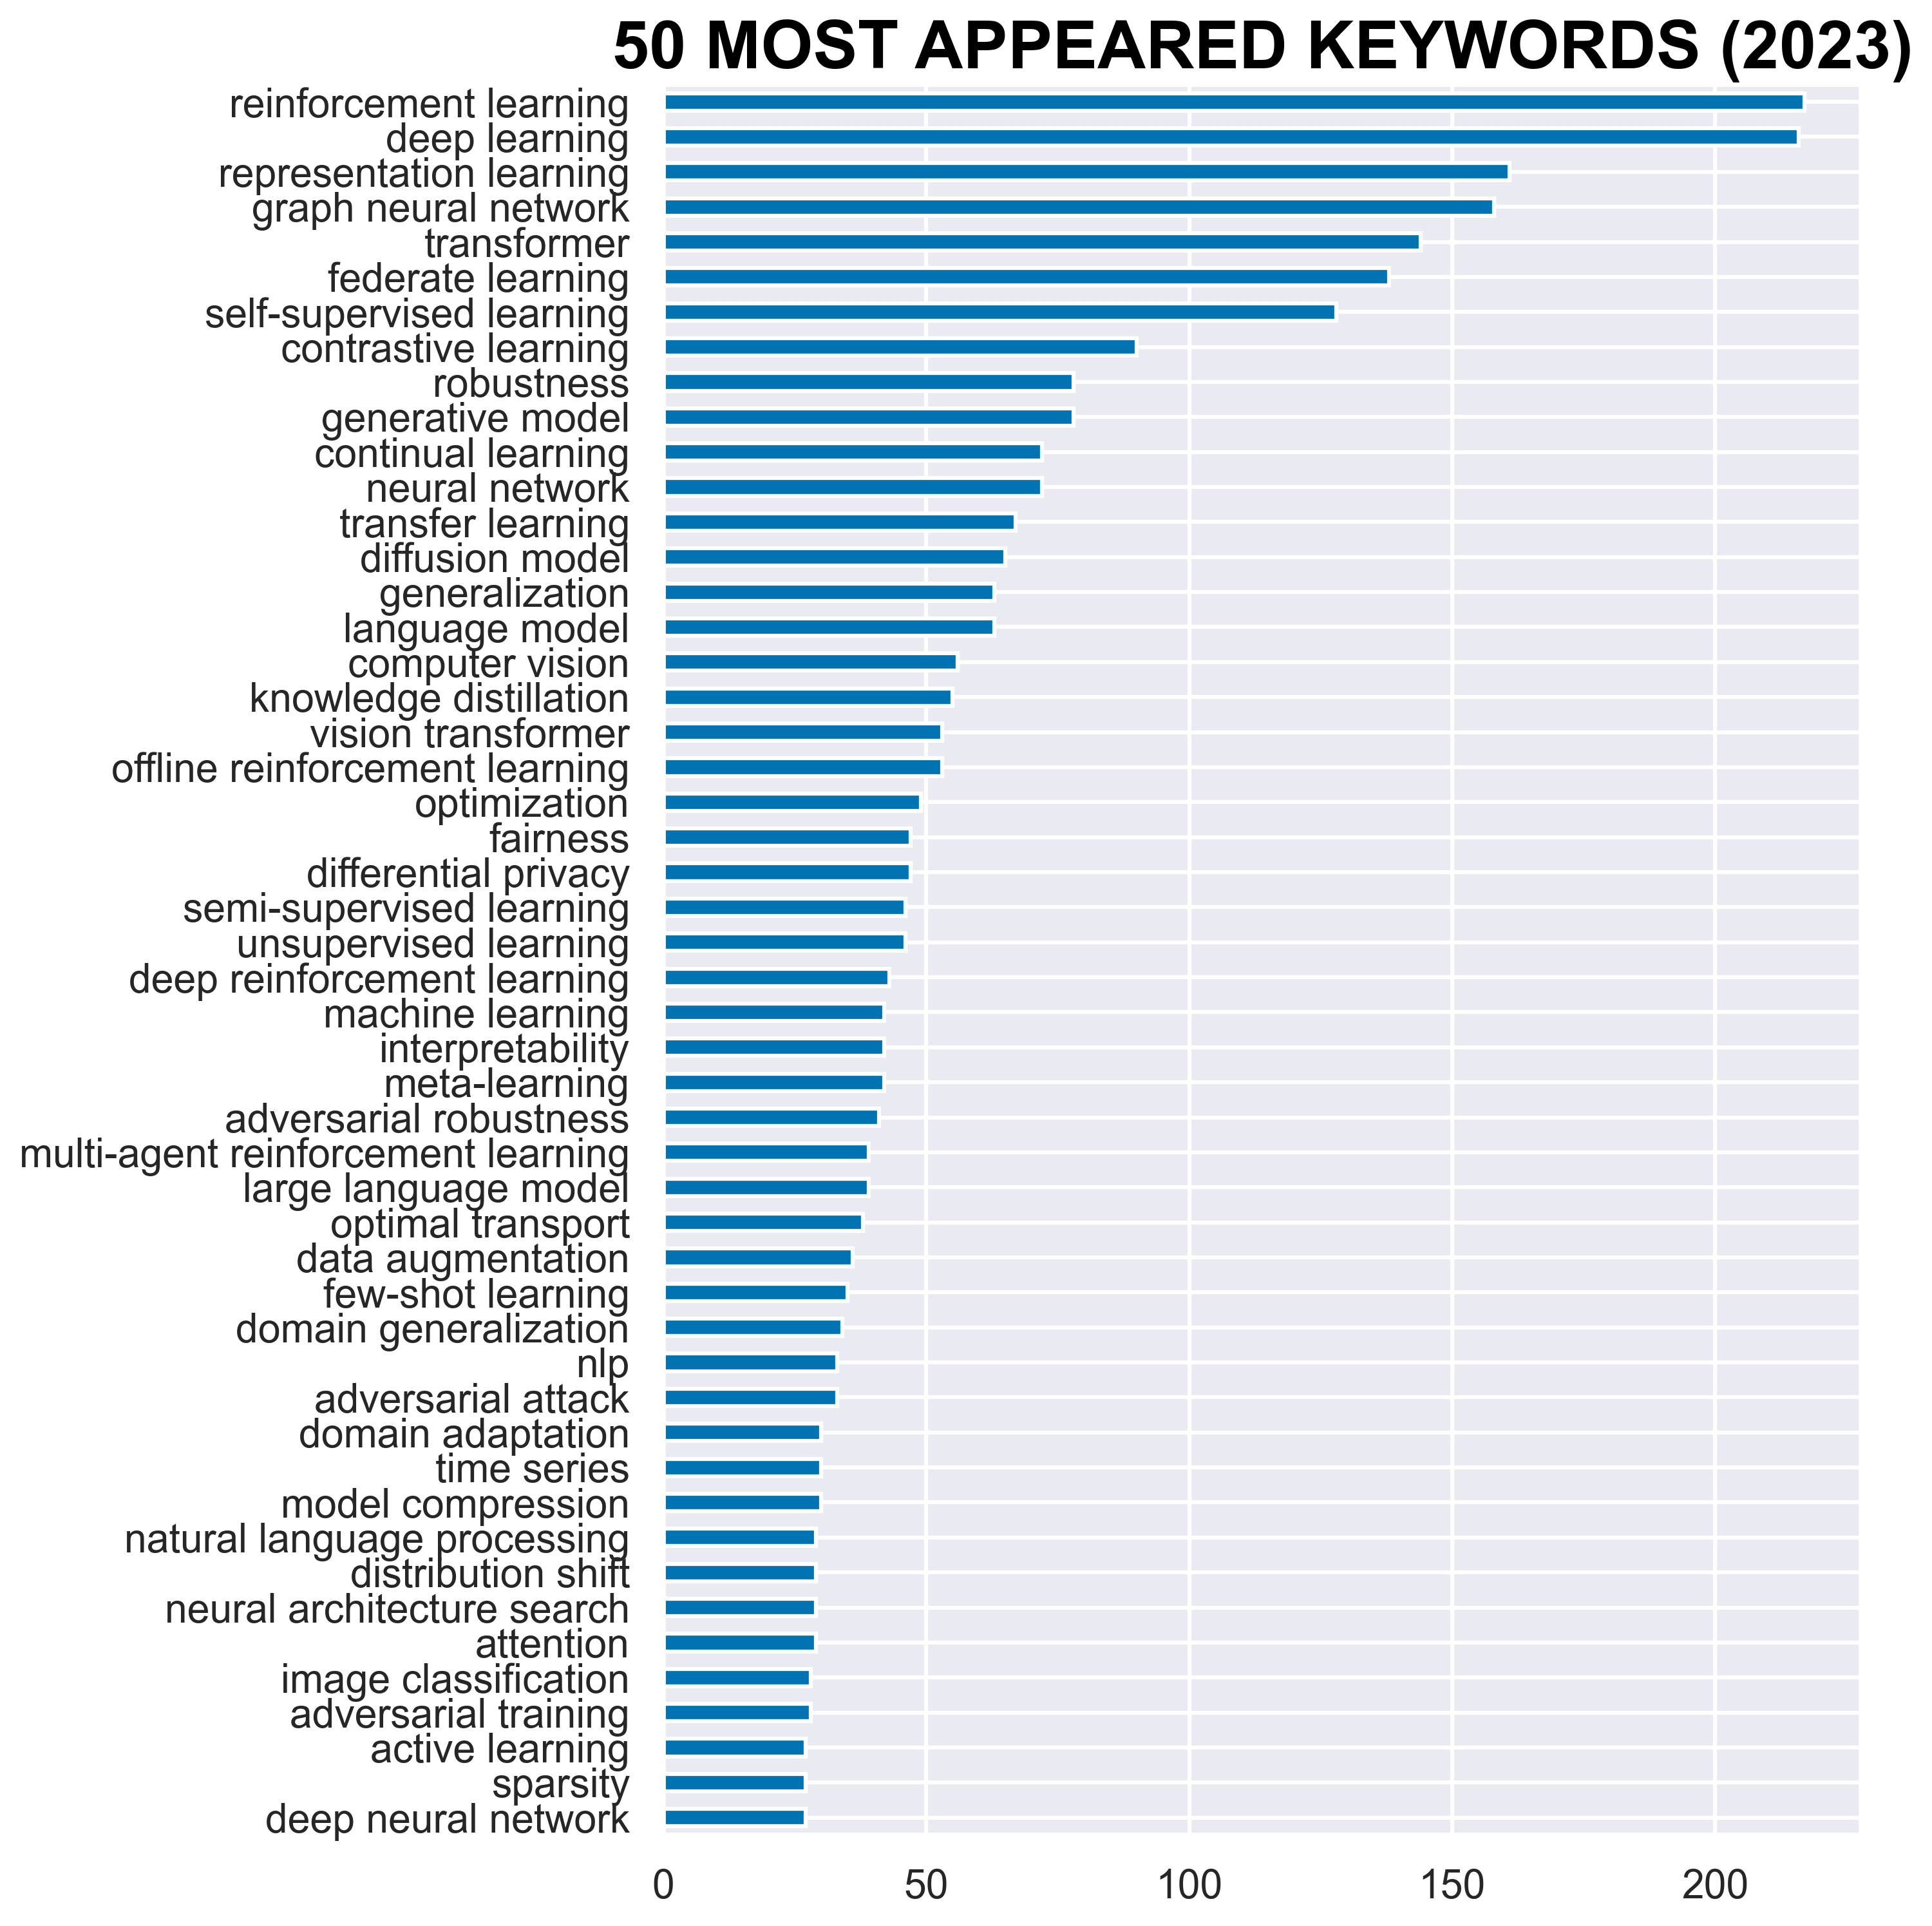

In [6]:
words = pd.Series(
    ', '.join(df['keywords'].dropna().apply(partial(transform, stopword=False))).lower().replace(' learn', ' learning').split(',')
).str.strip()

counts = words.value_counts().sort_values(ascending=True)

plt.subplots(dpi=300)
counts.iloc[-50:].plot.barh(figsize=(8, 12), fontsize=15)
plt.title(f'50 MOST APPEARED KEYWORDS ({year})', loc='center', fontsize='25',
          fontweight='bold', color='black')
plt.savefig(f'sources/50_most_keywords_{year}.png', dpi=300, bbox_inches='tight')

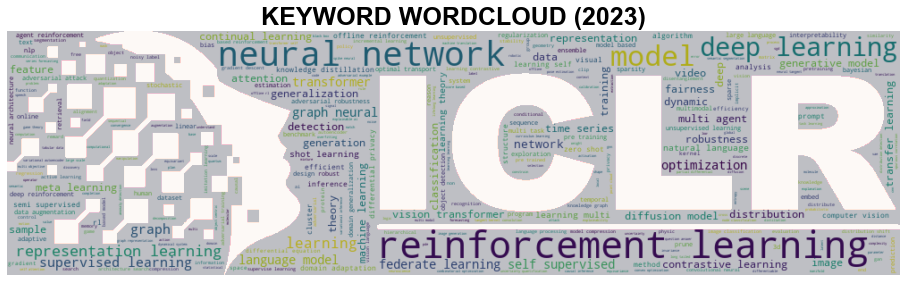

In [7]:
logo = imread('sources/logo-mask.png')
wordcloud = WordCloud(background_color="white", max_words=2000, max_font_size=100, 
           width=1280, height=640, random_state=0, mask=logo).generate(' '.join(words))

fig = plt.figure(figsize=(16, 8))
plt.imshow(logo)
plt.imshow(wordcloud, interpolation='bilinear', alpha=.75)
plt.title(f'KEYWORD WORDCLOUD ({year})', loc='center', fontsize='25',
          fontweight='bold', color='black')
plt.axis("off")
plt.savefig(f'sources/logo_wordcloud_keywords_{year}.png', dpi=300, bbox_inches='tight')